<img src = "https://imgur.com/HE0kDhA.jpg"  align = "center">

# **Overfitting Handling** 
**Bagian A :** Variation of Overfitting and Underfitting Handling Techniques #2
* Hyperparameter tuning
* Learning Rate Scheduller

Membangun sebuah best fit model merupakan tantangan yang sering dihadapi ketika kita ingin membuat model machine learning (ataupun deep learning). Pada sesi sebelumnya kita telah berkenalan dengan 2 cara penanganan kondisi overfit, yakni dengan penambahan layer Batch Normalization dan Dropout layer. Selain kedua cara tersebut, ada lagi cara yang bisa digunakan untuk menekan kondisi overfit, yakni :

*   Hyperparameter tuning
*   Learning rate scheduller

Dalam sesi ini, kita akan mencoba menerapkan kedua cara tersebut untuk mengatasi overfit

### **Hyperparameter Tuning**

Dalam pembuatan model menggunakan metode neural network, ada beberapa parameter yang harus didefinisikan secara manual. Pemilihan nilai dari parameter ini akan sangan mempengaruhi model yang dihasilkan. Beberapa parameter tersebut antara lain:
*   **Epoch**, adalah parameter yang berfungsi untuk menentukan berapa kali model kita harus belajar dari data train yang ada
*   **Learning Rate**, adalah parameter yang menentukan kecepatan model dalam belajar
*   **Activation function**, adalah fungsi yang digunakan dalam setiap layer untuk mengubah nilai input menjadi nilai output
*   **Batch Size**, adalah parameter yang menentukan berapa banyak data yang harus dipelajari oleh model sebelum dia mengubah nilai bobotnya. Parameter ini juga akan mempengaruhi berapa kali model harus merubah bobot dalam satu kali epoch.
*   **Optimizers**, adalah fungsi yang digunakan agar model dapat belajar dari nilai error yang dihasilkan di tiap epoch dengan lebih baik



Selain parameter-parameter di atas, ada banyak lagi parameter-parameter lain yang juga akan sangat menentukan seberapa baik model yang dihasilkan. Sebagai contoh saat kita menggunakan metode CNN, maka kita juga harus menentukan sendiri berapa jumlah filter yang ada di layer convolusi? berapa ukuran dimensi filternya? berapa banyak neuron yang harus kita letakkan di hidden layer? berapa nilai prosentase yang harus kita definisikan di layer dropout? dan banyak lagi yang lainnya. Agar bisa mendapatkan model terbaik, kita harus melakukan *tuning* (penyesuaian) terhadap nilai dari tiap parameter tersebut.

Pada kesempatan kali ini, kita hanya akan mencoba mengganti fungsi **aktivasi** serta **optimizers** untuk mengetahui seberapa efektif metode ini dalam menekan kondisi overfit pada model

### **Learning Rate Scheduller**

Seperti yang dijelaskan di atas, learning rate adalah salah satu parameter yang akan menentukan kecepatan model dalam belajar. Learning rate memiliki range nilai antara 0 dan 1. Kecepatan belajar yang dimaksud disini sebenarnya adalah seberapa besar perubahan nilai bobot dalam tiap epoch. Semakin kecil nilai learning rate, maka semakin kecil pula perubahan nilai bobot di tiap epoch. Demikian pula sebaliknya.

![alt text](https://i.imgur.com/aIi17zZ.png)

Seperti yang terlihat dalam gambar di atas, pada dasarnya apa yang dilakukan model ketika belajar adalah seperti seekor semut yang kita letakkan di pinggir mangkuk. Semut itu akan berusaha untuk mencapai dasar mangkuk. Akan tetapi, permukaan mangkuk tidak mulus seperti yang terlihat, melainkan ada banyak tanjakan dan turunan yang harus dilalui semut tadi. Dan semut tersebut tidak mengetahui dimana lokasi dasar dari mangkuk. Bahkan dia juga tidak tahu saat ini sedang berada dimana. Semut tersebut hanya akan berusaha untuk terus turun, sampai dia menganggap tidak ada lagi posisi yang lebih rendah dari posisi saat ini

Ilustrasi di atas menggambarkan apa yang dialami oleh model. Model akan terus berusaha mencari nilai error (loss) terkecil tiap kali dia melangkah. satu langkah adalah satu epoch. Sedangkan besar langkah yang dilakukan adalah learning rate. Semakin besar learning rate, maka semakin besar pula langkah yang diambil oleh semut tersebut. Demikian pula sebaliknya. Jika semut tadi mengambil langkah terlalu besar atau lebar, maka semakin cepat pula ia dapat menuju ke dasar mangkuk (global optimum). Walaupun, ada kemungkinan, dia akan melewatkan dasar mangkuk tersebut. Akan tetapi, jika langkahnya terlalu kecil, maka semakin lama pula waktu yang dia butuhkan untuk sampai di dasar mangkuk. Bahkan, ada kemungkinan, dia akan terjebak di cekungan (local optimum) yang dia kira dasar mangkuk, padahal bukan.

Kemudian, bagaimana caranya agar semut tadi bisa menuju dasar mangkuk dengan cepat, sekaligus hati-hati agar jangan sampai melewatkan dasar mangkuk yang sebenarnya? Jawabannya adalah dengan memperbesar langkah di awal epoch, dan sedikit demi sedikit memperpendek besar langkah ketika sudah mendekati akhir epoch. Inilah yang disebut dengan **learning rate scheduller**.

Dari beberapa penelitian, learning rate scheduller cukup efektif dalam menekan kondisi overfit. Kita akan membuktikannya dalam modul kali ini



---



---



## **Implementasi**

### **Load Dataset**

In [ ]:
# Download dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-09-05 03:35:57--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.250.141.128, 142.251.2.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   130MB/s    in 0.5s    

2021-09-05 03:35:58 (130 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
# Ekstrak dataset

import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# Definisikan path untuk data train dan data validation

base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

### **Data Preprocessing**

In [ ]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (2000, 150, 150, 3)
Train Label =  (2000,)
Validation Data =  (1000, 150, 150, 3)
Validation Label =  (1000,)


In [ ]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [255 255 255]
Data setelah di-normalisasi  [1. 1. 1.]


In [ ]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  ['cats' 'cats' 'cats' 'cats' 'cats' 'dogs' 'dogs' 'dogs' 'dogs' 'dogs']
Label setelah di-encoder  [0 0 0 0 0 1 1 1 1 1]


### **Mendefinisikan Model**

Mengaplikasikan hyperparameter tuning

In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout

Keras mendukung beberapa activation function, diantaranya:
*   relu function
*   sigmoid function
*   softmax function
*   softplus function
*   softsign function
*   tanh function
*   selu function
*   elu function
*   exponential function
Pada modul sebelumnya, kita sudah menggunakan 'relu function'. Fungsi aktivasi ini memang cukup populer digunakan untuk kasus image classification. Selain 'relu', ada lagi fungsi aktivasi yang seringkali digunakan pada kasus image classification, yakni 'elu'. Di beberapa penelitian, 'elu' bahkan cukup efektif menekan kondisi overfitting. Pada modul kali ini, kita akan mencoba mengganti fungsi 'relu' dengan fungsi aktivasi 'elu', dan melihat hasilnya



Mengganti activation function, dari `relu` menjadi `elu`

In [ ]:
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='elu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='elu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='elu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())

In [ ]:
# Fully Connected Layer
model.add(Dense(128, activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Print model summary
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
batch_normalization_6 (Batch (None, 150, 150, 16)      64        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
batch_normalization_7 (Batch (None, 75, 75, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 38, 38, 64)       

In [ ]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


### **Model Inference**

In [ ]:
H = model.fit(x_train, y_train, batch_size=20, epochs=15, validation_data=(x_val, y_val))

Epoch 1/15
100/100 [==============================] - 65s 640ms/step - loss: 1.5917 - acc: 0.5435 - val_loss: 5.9014 - val_acc: 0.5000
Epoch 2/15
100/100 [==============================] - 64s 636ms/step - loss: 0.7819 - acc: 0.5795 - val_loss: 3.0223 - val_acc: 0.5390
Epoch 3/15
100/100 [==============================] - 64s 638ms/step - loss: 0.7436 - acc: 0.5910 - val_loss: 0.6709 - val_acc: 0.6220
Epoch 4/15
100/100 [==============================] - 64s 639ms/step - loss: 0.6845 - acc: 0.6350 - val_loss: 0.6201 - val_acc: 0.6480
Epoch 5/15
100/100 [==============================] - 64s 638ms/step - loss: 0.6394 - acc: 0.6435 - val_loss: 0.6145 - val_acc: 0.6610
Epoch 6/15
100/100 [==============================] - 64s 638ms/step - loss: 0.6023 - acc: 0.6895 - val_loss: 0.6654 - val_acc: 0.6310
Epoch 7/15
100/100 [==============================] - 64s 638ms/step - loss: 0.5713 - acc: 0.7100 - val_loss: 0.5464 - val_acc: 0.7090
Epoch 8/15
100/100 [==============================] - 6

### **Evaluasi**

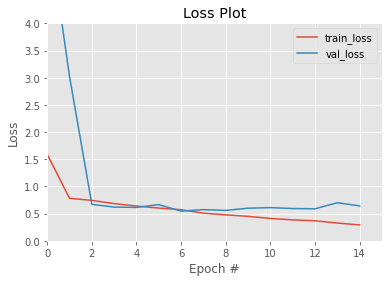

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.axis([0, 15, 0, 4])
plt.plot(np.arange(0, 15), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

### **Save dan Load Model**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save('drive/MyDrive/MLModule/hyperModel.h5')

In [ ]:
load_modelH = load_model('drive/MyDrive/MLModule/hyperModel.h5')
load_modelH.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
batch_normalization_6 (Batch (None, 150, 150, 16)      64        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
batch_normalization_7 (Batch (None, 75, 75, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 38, 38, 64)       

Dari grafik loss di atas, terlihat bahwa 'elu' cukup menjanjikan untuk menekan kondisi overfit pada model. Berikutnya, kita akan mencoba mengubah fungsi optimasi. Ada banyak fungsi optimasi pada neural network, 3 diantaranya yang cukup populer adalah :
*   Stochastic Gradient Descent (SGD)
*   RMSProp
*   Adam

### **Mendefinisikan Model**

**Menerapkan learning rate scheduller**

Mengganti optimizers dari Adam menjadi SGD dan menambahkan learning rate scheduller. Pada percobaan ini, kita akan mengganti optimizer menjadi SGD serta menambahkan learning rate scheduller.

In [ ]:
# Feature Extraction Layer
model3 = Sequential()

model3.add(InputLayer(input_shape=[150,150,3]))
model3.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='elu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=2, padding='same'))
model3.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='elu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=2, padding='same'))
model3.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='elu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=2, padding='same'))
model3.add(Dropout(0.25))
model3.add(Flatten())

# Fully Connected Layer
model3.add(Dense(128, activation='elu'))
model3.add(Dropout(0.5))
model3.add(Dense(1, activation='sigmoid'))

# Compile model
from tensorflow.keras.optimizers import SGD

model3.compile(optimizer=SGD(lr=0.001, decay=0.001/20), # decay = learning_rate / batch_size 
              loss='binary_crossentropy', 
              metrics=['acc'])

H3 = model3.fit(x_train, y_train, batch_size=20, epochs=15, validation_data=(x_val, y_val))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/15
100/100 [==============================] - 64s 639ms/step - loss: 0.9648 - acc: 0.5665 - val_loss: 0.6963 - val_acc: 0.5480
Epoch 2/15
100/100 [==============================] - 63s 636ms/step - loss: 0.7057 - acc: 0.6470 - val_loss: 0.7746 - val_acc: 0.5650
Epoch 3/15
100/100 [==============================] - 63s 636ms/step - loss: 0.6217 - acc: 0.6930 - val_loss: 0.7469 - val_acc: 0.6110
Epoch 4/15
100/100 [==============================] - 63s 635ms/step - loss: 0.6119 - acc: 0.7000 - val_loss: 0.6530 - val_acc: 0.6500
Epoch 5/15
100/100 [==============================] - 64s 637ms/step - loss: 0.5776 - acc: 0.7130 - val_loss: 0.6558 - val_acc: 0.6670
Epoch 6/15
100/100 [==============================] - 64s 636ms/step - loss: 0.5096 - acc: 0.7680 - val_loss: 0.6006 - val_acc: 0.6960
Epoch 7/15
100/100 [==============================] - 64s 636ms/step - loss: 0.5034 - acc: 0.7640 - val_loss: 0.6193 - val_acc: 0.6920
Epoch 8/15
100/100 [==============================] - 6

### **Evaluasi**

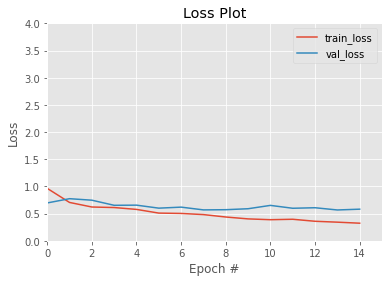

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.axis([0, 15, 0, 4])
plt.plot(np.arange(0, 15), H3.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), H3.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

Dari grafik loss di atas, terlihat bahwa mengganti optimizer dan menambahkan learning rate scheduller cukup efektif untuk menekan kondisi overfit dari model.

### **Save dan Load Model**

In [ ]:
model3.save('drive/MyDrive/MLModule/LRSModel.h5')

In [ ]:
load_modelLRS = load_model('drive/MyDrive/MLModule/LRSModel.h5')
load_modelLRS.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
batch_normalization_9 (Batch (None, 150, 150, 16)      64        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
batch_normalization_10 (Batc (None, 75, 75, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 38, 38, 64)       

## Melakukan prediksi dari input gambar acak

Saving cat.2007.jpg to cat.2007.jpg
cat


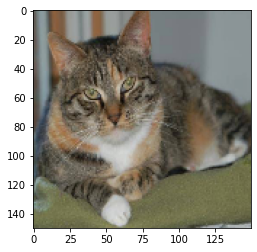

In [ ]:
from google.colab import files as file
from keras.preprocessing import image as img
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
 
myfile = file.upload()
 
for pt in myfile.keys():
  file_path = pt
  imgs = img.load_img(file_path, target_size=(150,150))
  img_plt = plt.imshow(imgs)
  im = img.img_to_array(imgs)
  im = np.expand_dims(im, axis=0)
 
  images = np.vstack([im])
  data = load_modelLRS.predict(images)
  labels = list(['cat', 'dog'])
  
  print(labels[np.argmax(data)])

## **Contoh penggunaan hparam dan tensorboard:**

Pelajari bagian ini untuk menggunakan hparam grid search dan tensorboard

### Download dan unzip dataset.

In [ ]:
# Download dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip 

In [ ]:
!unzip \cats_and_dogs_filtered.zip &> /dev/null 

In [ ]:
%cd /content/drive/My Drive/RESEARCH CENTER/Kaggle

/content/drive/My Drive/RESEARCH CENTER/Kaggle


### Definisi data generator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rescale=1./255,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

training_set = train_datagen.flow_from_directory("cats_and_dogs_filtered/train/",
                                                 target_size=(128,128),
                                                 color_mode="rgb",
                                                 shuffle=False,
                                                 batch_size = 8,
                                                 class_mode='categorical')

Using TensorFlow backend.


Found 2000 images belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        rescale=1./255,
                                        shear_range=0.2,
                                        horizontal_flip=True,
                                        fill_mode='nearest')

validation_set = validation_datagen.flow_from_directory("cats_and_dogs_filtered/validation/",
                                                        target_size=(128,128),
                                                        color_mode="rgb",
                                                        shuffle=False,
                                                        batch_size = 8,
                                                        class_mode='categorical')

Found 1000 images belonging to 2 classes.


### Load TensorBoard notebook extension dan Hapus semua **logs** sebelumnya

In [ ]:
import tensorflow as tf
from tensorboard.plugins.hparams import api as hp

In [ ]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
!rm -rf ./logs/ 

### Definisikan hparam yang ingin digunakan. 

Semakin banyak hparam yang didefinisikan maka semakin banyak pula kombinasi hyperparameter digunakan untuk training model. Semakin banyak kombinasi maka semakin memakan banyak waktu (FYI : lama training model yang digunakan dalam contoh ini +/- 3-4 jam menggunakan GPU).

Menyimpan semua summary hparam kedalam `logs/hparam_tuning` untuk digunakan oleh tensorboard dan sebagai penyimpanan sementara training information.

In [ ]:
HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([64, 128]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.2, 0.5))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd', 'adadelta']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_OPTIMIZER],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

### Definisikan `x_val dan y_val` dari validation data untuk evaluasi model.

In [ ]:
xvl, yvl = zip(*(validation_set[i] for i in range(len(validation_set))))
x_val, y_val = np.vstack(xvl), np.vstack(yvl)

### Definisikan Model menggunakan hparam.

Disini anda mendefinisikan model, compile model, training model secara bersamaan didalam fungsi `train_test_model`. Fungsi ini akan mengembalikan nilai akurasi rata-rata dari masing-masing model.

In [ ]:
def train_test_model(hparams):
  model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, (5, 5), 
                                                             activation=tf.nn.relu, 
                                                             input_shape=(128,128,3)),
                                      tf.keras.layers.BatchNormalization(),
                                      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                      tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
                                      tf.keras.layers.Conv2D(64, (5, 5), 
                                                             activation=tf.nn.relu),
                                      tf.keras.layers.BatchNormalization(),
                                      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                      tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
                                      tf.keras.layers.Conv2D(32, (5, 5), 
                                                             activation=tf.nn.relu),
                                      tf.keras.layers.BatchNormalization(),
                                      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                      tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(hparams[HP_NUM_UNITS], 
                                                            activation=tf.nn.relu),
                                      tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                      tf.keras.layers.Dense(32, activation=tf.nn.relu),
                                      tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
                                      tf.keras.layers.Dense(2, activation=tf.nn.softmax),
                                      ])

  model.compile(
      optimizer=hparams[HP_OPTIMIZER],
      loss='categorical_crossentropy',
      metrics=['accuracy'],
  )

  model.fit(training_set, 
            validation_data=validation_set, 
            epochs=25,
            )
  _, accuracy = model.evaluate(x_val, y_val)
  return accuracy

### Definisikan fungsi `run` 

Hal ini bertujuan untuk melakukan log record hparams yang berisi summary dari hyperparameters dan final accuracy-nya.

In [ ]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=50)

### Grid Search Training Model


Mulai jalankan training dan catat semuanya di bawah satu direktori induk.
Sekarang Anda dapat mencoba beberapa percobaan, latih masing-masing dengan serangkaian parameter yang berbeda. Untuk kesederhanaan, gunakan **grid search**: coba semua kombinasi parameter diskrit dan hanya batas bawah dan atas dari parameter bernilai riil. Untuk skenario yang lebih kompleks, mungkin lebih efektif untuk memilih setiap nilai hyperparameter secara acak (ini disebut **random search**). Ada metode yang lebih maju yang dapat digunakan.

Jalankan beberapa percobaan, hal ini akan memakan waktu yang cukup lama:

In [ ]:
['adam', 'sgd', 'adadelta', 'rmsprop', 'adamx', 'nadam']

In [ ]:
session_num = 0

for num_units in HP_NUM_UNITS.domain.values:
  for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
    for optimizer in HP_OPTIMIZER.domain.values:
      hparams = {
          HP_NUM_UNITS: num_units,
          HP_DROPOUT: dropout_rate,
          HP_OPTIMIZER: optimizer,
      }
      run_name = "run-%d" % session_num
      print('--- Starting trial: %s' % run_name)
      print({h.name: hparams[h] for h in hparams})
      run('logs/hparam_tuning/' + run_name, hparams)
      session_num += 1


--- Starting trial: run-0
{'num_units': 64, 'dropout': 0.2, 'optimizer': 'adadelta'}
Epoch 1/25
250/250 [==============================] - 22s 90ms/step - loss: 0.9160 - accuracy: 0.5055 - val_loss: 0.7463 - val_accuracy: 0.5000
Epoch 2/25
250/250 [==============================] - 22s 89ms/step - loss: 0.9109 - accuracy: 0.5075 - val_loss: 0.8805 - val_accuracy: 0.4880
Epoch 3/25
250/250 [==============================] - 22s 89ms/step - loss: 0.9210 - accuracy: 0.4890 - val_loss: 0.8764 - val_accuracy: 0.4550
Epoch 4/25
250/250 [==============================] - 22s 89ms/step - loss: 0.9016 - accuracy: 0.4930 - val_loss: 0.8704 - val_accuracy: 0.4090
Epoch 5/25
250/250 [==============================] - 22s 89ms/step - loss: 0.8983 - accuracy: 0.4865 - val_loss: 0.8384 - val_accuracy: 0.4560
Epoch 6/25
250/250 [==============================] - 23s 90ms/step - loss: 0.9099 - accuracy: 0.4865 - val_loss: 0.8651 - val_accuracy: 0.4650
Epoch 7/25
250/250 [==============================]

### Visualisasi hasil evaluasi semua model dengan hyperparameternya menggunakan Tensorboard

In [ ]:
%%bash
wget -q 'https://storage.googleapis.com/download.tensorflow.org/tensorboard/hparams_demo_logs.zip'
unzip -q hparams_demo_logs.zip -d logs/hparam_demo

replace logs/hparam_demo/hparams_demo/0/events.out.tfevents.1550612933.goshri.c.googlers.com? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(EOF or read error, treating as "[N]one" ...)


In [ ]:
%tensorboard --logdir logs/hparam_tuning

In [ ]:
!kill 5496